グラフの基礎

グラフ：”頂点(vertex)”と”辺(edge)”から構成される．

※頂点は”節点(node)”，辺は”弧(arc)”，”リンク(link)”，”枝(branch)”などとも呼ばれる

ある2つの頂点が1つの辺でつながる時，2つの頂点は隣接している

ある辺の両端の頂点：端点(endpoint)

ある頂点から出ている辺の数：次数(degree)

ある2つの頂点を結ぶ辺の集合：道(path)

全ての頂点の間に道があるグラフ：連結グラフ(connected graph)

全ての頂点ペアについてそれらを結ぶ道が1つしかないグラフ：木(tree)

ある頂点からいくつかの頂点を経て元の頂点に戻ってくる道がある：閉路(cycle)

いくつかの木で構成されるグラフ：森(forest)

辺に向きがあるグラフ：有向グラフ(directed graph)

辺に向きがないグラフ：無向グラフ(undirected graph)

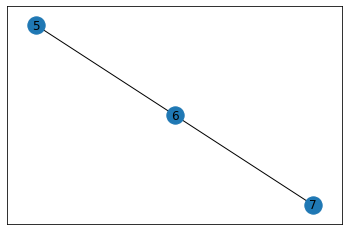

In [ ]:
#Pythonで使えるグラフのための外部パッケージ
import networkx as nx
import matplotlib.pyplot as plt
graph = nx.Graph()
graph.add_edge(5, 6)
graph.add_edge(6, 7)
nx.draw_networkx(graph)
plt.show()

In [64]:
#ランダムなグラフの作成
import random

def generate_graph(n, m):
  #nこの頂点とm個の辺を持つグラフ
  graph_data = [[0] * n for i in range(n)]
  edge_set = set()
  while len(edge_set) < m:
    i, j = random.sample(range(n), 2)
    if i > j: i, j = j, i
    edge_set.add((i, j))
    graph_data[i][j] = graph_data[j][i] = 1
  return graph_data, edge_set



In [77]:
random.seed(6)
node_num = 16
edge_num = 20
test_graph, edge_set = generate_graph(node_num, edge_num)
edge_set

{(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)}

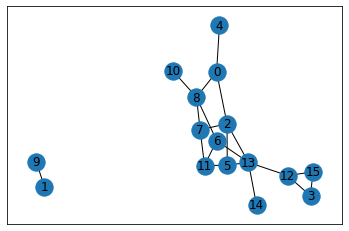

In [66]:
#作成したグラフの表示
graph1 = nx.Graph()
for u,v in edge_set:
    graph1.add_edge(u, v)
nx.draw_networkx(graph1)

In [67]:
#隣接行列の表示
test_graph

[[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

連結グラフを探索する

幅優先探索：近いところから順に到達できる頂点を探し尽くす

深さ優先探索：行けるところまで行って戻ってくる

キューについて(幅優先ではキューを使用する)

キュー：データの待ち行列

→データの先頭から順に処理が行われ，全ての処理が終わるとキューは空になる(FIFO)

pythonのリストを使った場合，先頭の要素を取り除く処理にO(n)がかかる．collectionsのdequeはその処理を効率化したもの

In [68]:
from collections import deque

queue = deque([])
queue.append(1)
queue.append(2)
queue.append(3)
print(queue)

print(queue.popleft())
print(queue)

deque([1, 2, 3])
1
deque([2, 3])


幅優先探索のアルゴリズム

入力：スタートの頂点(v)，グラフを表現する隣接行列

出力：頂点vから到達できる全ての頂点

1：作業用のキュー(Q)と到達した頂点を保存するためのset(S)を用意し，それぞれにvを追加

2：キューから頂点を取り出す

3：取り出した頂点の隣にある全てのてんに対して以下の処理をする

  Sに入っていなければQとSの両方へ追加する

4：QがからならSを出力して終了．そうでなければ2へ

In [63]:
def breadth_first_search(start, W):
  #隣接行列Wで表現されるグラフについて，startから到達できるnodeの一覧を返す
  work_queue = deque([])
  visited = set()
  work_queue.append(start)
  visited.add(start)
  while work_queue:
    here = work_queue.popleft()
    for i, node in enumerate(W[here]):
      if node == 0: continue #隣接したものがない
      if i not in visited:
        work_queue.append(i)
        visited.add(i)
  return visited

In [69]:
breadth_first_search(10, test_graph)

{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

スタックについて(深さ優先探索ではスタックを使用する)

スタック：データの積み重ね

→後からきたデータは先に入ったデータの上に積み重なる．最後にスタックに追加されたで0たから処理していく(LIFO)

深さ優先探索は，幅優先探索でキューを使っていたところをスタックにすることで実装できる

In [ ]:
def depth_first_search(start, W):
  work_stack = []
  visited = set()
  work_stack.append(start)
  visited.add(start)
  while work_stack:
    here = work_stack.pop()
    for i, node in enumerate(W[here]):
      if node == 0: continue
      if i not in visited:
        work_stack.append(i)
        visited.add(i)
  return visited

In [71]:
depth_first_search(10, test_graph)

{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

最短距離を求める

ダイクストラ法：辺の重みが負でない場合に最短距離を求める．

ダイクストラ法の計算量：

頂点数をn，辺の数をmをする．ダイクストラは各頂点に到達したとき，ヒープからデータを1つ取り出す．また，各辺に関して緩和が行われるため，ヒープが追加される可能性がある．1回のヒープにかかうr計算量はO(logn)なので，全体としてはO((n+m)logn)

頂点と辺の数が同じくらいならO(nlogn)→最も密なグラフを考えるとm=n^2となるので，計算量はO(n^2logn)

In [50]:
import math
import heapq

def dijkstra(start, W):
  #スタートの頂点と隣接行列を受け取り，全ての頂点への最短距離を返す
  
  #仮の最短距離を∞に設定
  distance_list = [math.inf] * len(W)
  #自分への距離は0
  distance_list[start] = 0
  #最短距離が確定した頂点のリスト
  done_list = []
  #次に処理する頂点を決めるためのヒープ
  wait_heap = []
  for i, d in enumerate(distance_list):
    heapq.heappush(wait_heap, (d, i))
  while wait_heap:
    p = heapq.heappop(wait_heap)
    i = p[1]
    if i in done_list:
      continue
    done_list.append(i)
    #iに隣接する全ての頂点に対する処理
    for j, x in enumerate(W[i]):
      if x == 1 and j not in done_list:
        #緩和
        d = min(distance_list[j], distance_list[i] + x)
        distance_list[j] = d
        heapq.heappush(wait_heap, (d, j))
  return distance_list


In [72]:
dijkstra(6, test_graph)

[2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3]

全ての頂点間の最短距離

ダイクストラ法で全ての頂点間の最短距離を計算した場合

→各頂点を出発点としてn回実行する = O(n(n+m)logn)．辺が密であった場合はO(n^3logn)

Floyd-Warshall法

→O(n^3)で全ての頂点間の最短距離を計算できる．辺の密度が低い時はダイクストラの方が速い．

d^(k-1)(u,v)をk-1番目までの頂点だけを考慮に入れている時のuとvの最短距離とする．k番目の頂点についてd^k(u,v)は以下のようになる

d^k(u, v) = min{d^(k-1)(u,v), d^(k-1)(u, k)+d^(k-1)(k, v)}

In [88]:
def all_pairs_shortest_paths(W):
    n = len(W) #頂点の数
    res = [[0] * n for i in range(n)]
    #用意した行列を初期化
    for i in range(n):
        for j in range(i, n):
            if i == j:
                val = 0
            elif W[i][j]:
                val = W[i][j]
            else:
                val = math.inf
            res[i][j] = res[j][i] = val
    #動的計画法ですべての頂点間の最短距離を求める
    for k in range(n):
        for u in range(n):
            for v in range(n):
                res[u][v] = min(res[u][v], res[u][k] + res[k][v])
    return res

In [89]:
all_pairs_shortest_paths(test_graph)

[[0, inf, 1, 4, 1, 2, 2, 2, 1, inf, 2, 3, 3, 2, 3, 4],
 [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf],
 [1, inf, 0, 3, 2, 1, 2, 1, 2, inf, 3, 2, 2, 1, 2, 3],
 [4, inf, 3, 0, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 1],
 [1, inf, 2, 5, 0, 3, 3, 3, 2, inf, 3, 4, 4, 3, 4, 5],
 [2, inf, 1, 3, 3, 0, 2, 2, 3, inf, 4, 1, 2, 1, 2, 3],
 [2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3],
 [2, inf, 1, 4, 3, 2, 2, 0, 1, inf, 2, 1, 3, 2, 3, 4],
 [1, inf, 2, 4, 2, 3, 1, 1, 0, inf, 1, 2, 3, 2, 3, 4],
 [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf],
 [2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5],
 [3, inf, 2, 4, 4, 1, 1, 1, 2, inf, 3, 0, 3, 2, 3, 4],
 [3, inf, 2, 1, 4, 2, 2, 3, 3, inf, 4, 3, 0, 1, 2, 1],
 [2, inf, 1, 2, 3, 1, 1, 2, 2, inf, 3, 2, 1, 0, 1, 2],
 [3, inf, 2, 3, 4, 2, 2, 3, 3, inf, 4, 3, 2, 1, 0, 3],
 [4, inf, 3, 1, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 0]]